In [1]:
install.packages("ggplot2")
library('ggplot2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtable’, ‘S7’, ‘scales’




In [124]:
# read the CSV
df <- read.csv("/kaggle/input/r-course-hm/Data/NHANES.csv", sep = ";", dec = ".")  


# first rows
head(df)

# last rows
tail(df)

# structure (like pandas .info())
str(df)

# summary statistics
summary(df)


,ID,Gender,Age,Weight,Height,BMI,DirectChol,BPSysAve,BPDiaAve,SmokeNow,WT_STATUS,BP_CAT
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>
1,51679,male,16,73.2,172.0,24.74,1.14,126,72,NonSmoker,Normal,Prehypertension
2,51754,female,58,106.0,167.2,37.92,1.32,144,86,NonSmoker,Obese,Hypertension
3,51906,male,46,108.9,178.4,34.22,1.01,131,87,NonSmoker,Obese,Hypertension
4,52259,male,25,75.7,179.6,23.47,0.98,115,72,Smoker,Normal,Normal
5,52927,female,35,85.6,171.4,29.14,1.58,121,80,NonSmoker,Overweight,Prehypertension
6,52995,male,20,70.2,176.3,22.59,0.80,113,65,NonSmoker,Normal,Normal


,ID,Gender,Age,Weight,Height,BMI,DirectChol,BPSysAve,BPDiaAve,SmokeNow,WT_STATUS,BP_CAT
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>
70,70025,female,16,64.8,150.8,28.5,1.34,94,53,NonSmoker,Overweight,Normal
71,70545,male,31,77.4,180.7,23.7,1.29,113,72,NonSmoker,Normal,Normal
72,70845,female,21,51.2,156.9,20.8,2.46,106,59,NonSmoker,Normal,Normal
73,71183,male,38,71.4,177.8,22.6,1.45,110,52,Smoker,Normal,Normal
74,71205,female,12,58.7,164.7,21.6,1.50,94,58,NonSmoker,Normal,Normal
75,71908,female,66,88.7,159.0,35.1,1.86,114,70,NonSmoker,Obese,Normal


'data.frame':	75 obs. of  12 variables:
 $ ID        : int  51679 51754 51906 52259 52927 52995 53296 53322 53369 53404 ...
 $ Gender    : chr  "male" "female" "male" "male" ...
 $ Age       : int  16 58 46 25 35 20 18 32 39 54 ...
 $ Weight    : num  73.2 106 108.9 75.7 85.6 ...
 $ Height    : num  172 167 178 180 171 ...
 $ BMI       : num  24.7 37.9 34.2 23.5 29.1 ...
 $ DirectChol: num  1.14 1.32 1.01 0.98 1.58 0.8 0.72 0.91 1.4 0.8 ...
 $ BPSysAve  : int  126 144 131 115 121 113 112 108 116 123 ...
 $ BPDiaAve  : int  72 86 87 72 80 65 67 67 73 75 ...
 $ SmokeNow  : chr  "NonSmoker" "NonSmoker" "NonSmoker" "Smoker" ...
 $ WT_STATUS : chr  "Normal" "Obese" "Obese" "Normal" ...
 $ BP_CAT    : chr  "Prehypertension" "Hypertension" "Hypertension" "Normal" ...


       ID           Gender               Age            Weight      
 Min.   :51679   Length:75          Min.   :12.00   Min.   : 42.90  
 1st Qu.:55818   Class :character   1st Qu.:23.00   1st Qu.: 61.30  
 Median :60281   Mode  :character   Median :30.00   Median : 72.10  
 Mean   :60807                      Mean   :33.81   Mean   : 72.42  
 3rd Qu.:65278                      3rd Qu.:42.50   3rd Qu.: 82.90  
 Max.   :71908                      Max.   :73.00   Max.   :108.90  
     Height           BMI          DirectChol       BPSysAve    
 Min.   :147.9   Min.   :16.93   Min.   :0.720   Min.   : 91.0  
 1st Qu.:160.4   1st Qu.:22.15   1st Qu.:1.045   1st Qu.:106.0  
 Median :168.0   Median :24.91   Median :1.290   Median :112.0  
 Mean   :167.8   Mean   :25.58   Mean   :1.349   Mean   :115.0  
 3rd Qu.:172.9   3rd Qu.:28.90   3rd Qu.:1.590   3rd Qu.:121.5  
 Max.   :190.4   Max.   :37.92   Max.   :2.920   Max.   :167.0  
    BPDiaAve       SmokeNow          WT_STATUS            BP_C

In [3]:
# Gender: cat
# BMI: con
# BPSysAve: con
# WT_STATUS: con
# BP_CAT: cat 

In [4]:
df$Gender <- factor(df$Gender)
table(df$Gender)
# Nominal


female   male 
    39     36 

In [5]:
df$SmokeNow <- factor(df$SmokeNow)
table(df$SmokeNow)
# Nominal


NonSmoker    Smoker 
       59        16 

In [6]:
df$WT_STATUS <- factor(df$WT_STATUS,levels = c("Normal", "Overweight", "Obese"),ordered = TRUE)
table(df$WT_STATUS)
# Nominal


    Normal Overweight      Obese 
        39         22         14 

In [7]:
df$BP_CAT <- factor(df$BP_CAT, levels = c("Normal", "Prehypertension", "Hypertension"),ordered = TRUE)
table(df$BP_CAT)
# Nominal


         Normal Prehypertension    Hypertension 
             53              11              11 

In [8]:
table(x = df$BP_CAT)

x
         Normal Prehypertension    Hypertension 
             53              11              11 

In [9]:
prop.table(table(x = df$BP_CAT))

x
         Normal Prehypertension    Hypertension 
      0.7066667       0.1466667       0.1466667 

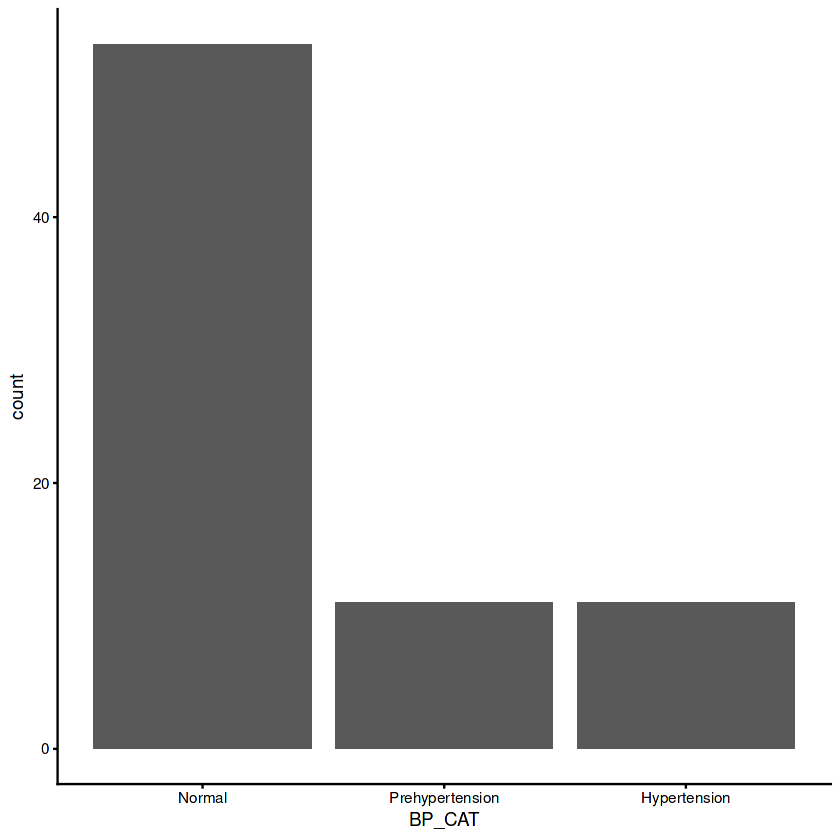

In [10]:
ggplot(data = df,
       mapping = aes(x = BP_CAT)) +
    geom_bar() + 
    theme_classic()

In [11]:
max(table(x = df$BP_CAT))

[1] 53

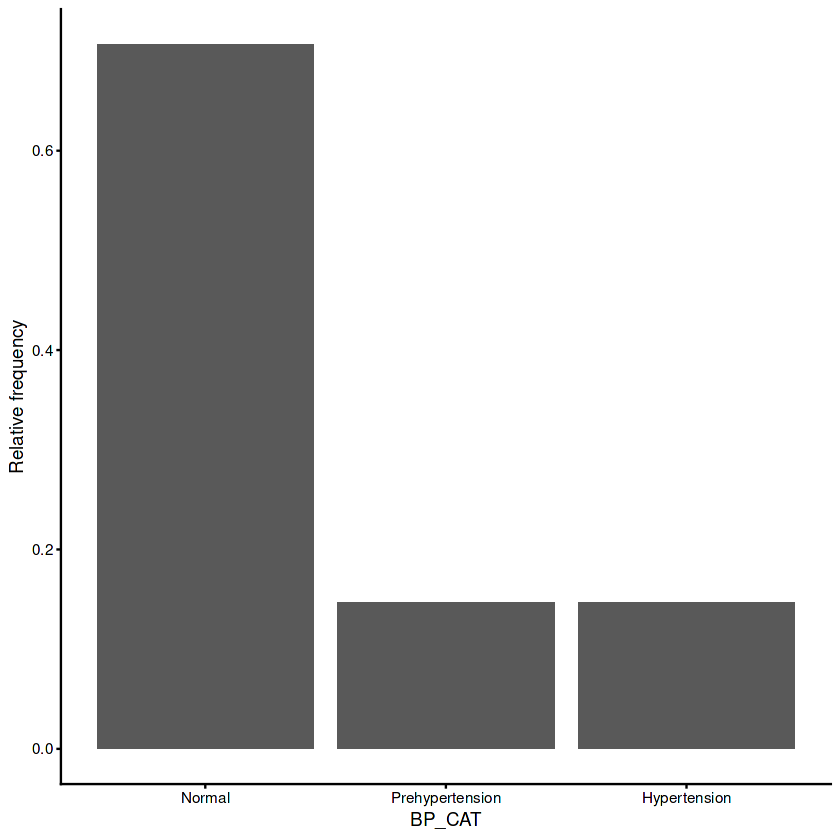

In [12]:
ggplot(data = df,
       mapping = aes(x = BP_CAT))+
    geom_bar(mapping = aes(y = after_stat(prop), group = 1)) +
    labs(y = "Relative frequency")+
    theme_classic()

In [13]:
mean(df$BPSysAve)

[1] 114.9733

In [14]:
median(df$BPSysAve)

[1] 112

In [15]:
help(quantile)

quantile {stats},R Documentation
x,"numeric vector whose sample quantiles are wanted, or an object of a class for which a method has been defined (see also ‘details’). NA and NaN values are not allowed in numeric vectors unless na.rm is TRUE."
probs,"numeric vector of probabilities with values in [0,1]. (Values up to ‘⁠2e-14⁠’ outside that range are accepted and moved to the nearby endpoint.)"
na.rm,"logical; if true, any NA and NaN's are removed from x before the quantiles are computed."
names,"logical; if true, the result has a names attribute. Set to FALSE for speedup with many probs."
type,an integer between 1 and 9 selecting one of the nine quantile algorithms detailed below to be used.
digits,"used only when names is true: the precision to use when formatting the percentages. In R versions up to 4.0.x, this had been set to max(2, getOption(""digits"")), internally."
...,further arguments passed to or from other methods.


In [16]:
quantile(x <-rnorm(df))

0%         25%         50%         75%        100% 
-2.32875042 -0.87972990  0.07137702  1.43290704  1.75357906

In [17]:
quantile(df$BPSysAve, 
         probs = c(0.10, 0.25, 0.50, 0.75, 0.90))

10%   25%   50%   75%   90% 
101.4 106.0 112.0 121.5 130.6

In [18]:
IQR(df$BPSysAve)


[1] 15.5

In [19]:
sd(df$BPSysAve)


[1] 14.0693

In [20]:
mean(df$BPSysAve)
#  most of the data are around the mean

[1] 114.9733

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


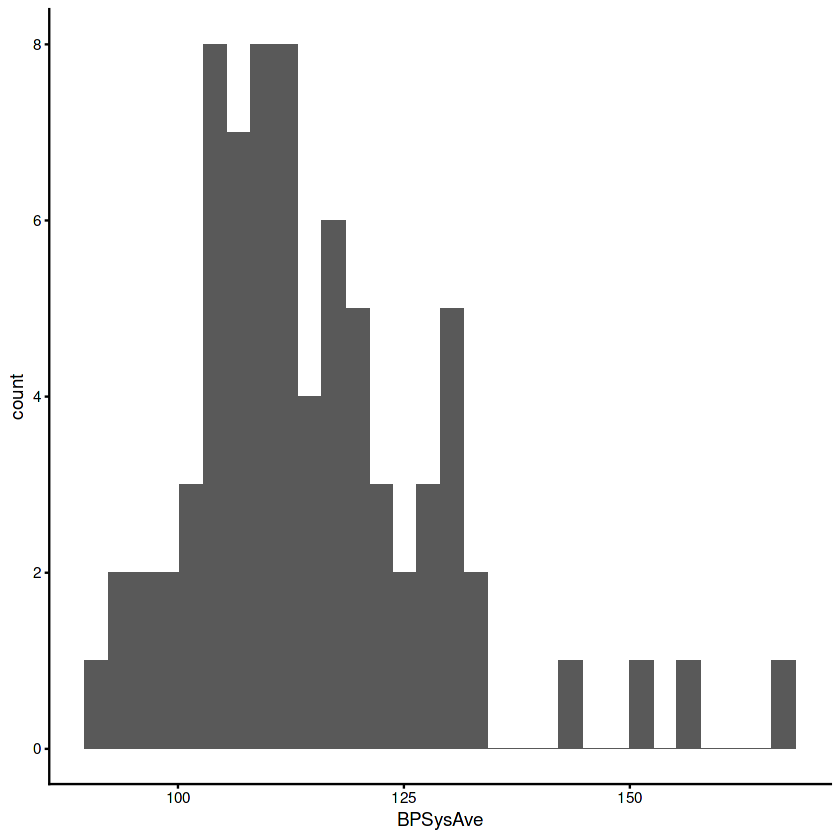

In [21]:
ggplot(data = df,
    mapping = aes(x = BPSysAve)) +
    geom_histogram() + 
    theme_classic()

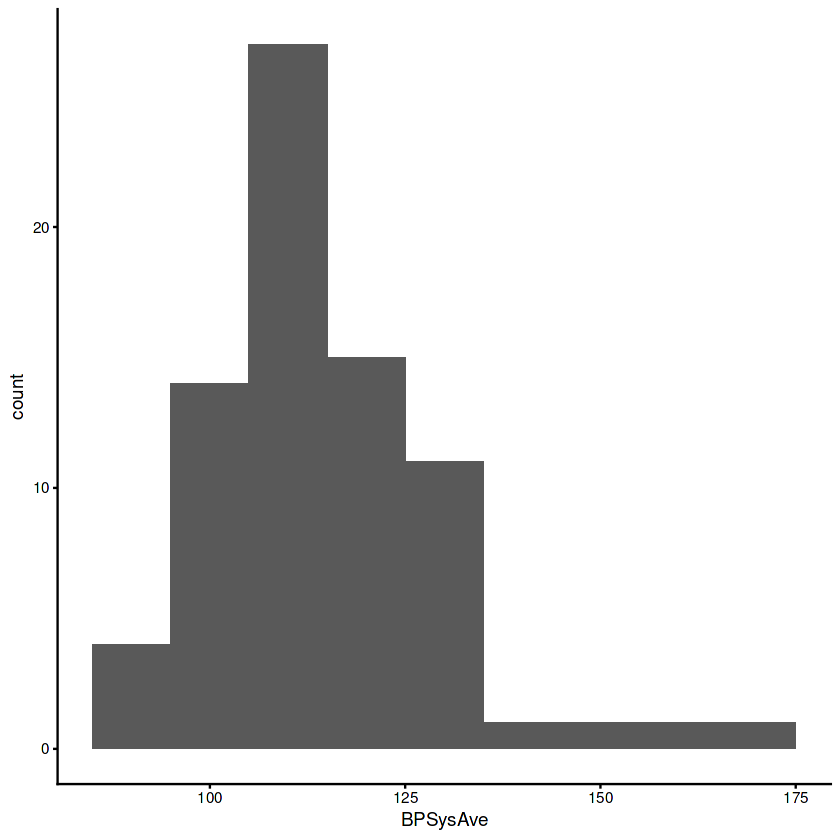

In [22]:
ggplot(data = df,
    mapping = aes(x = BPSysAve)) +
    geom_histogram(binwidth=10) + 
    theme_classic()

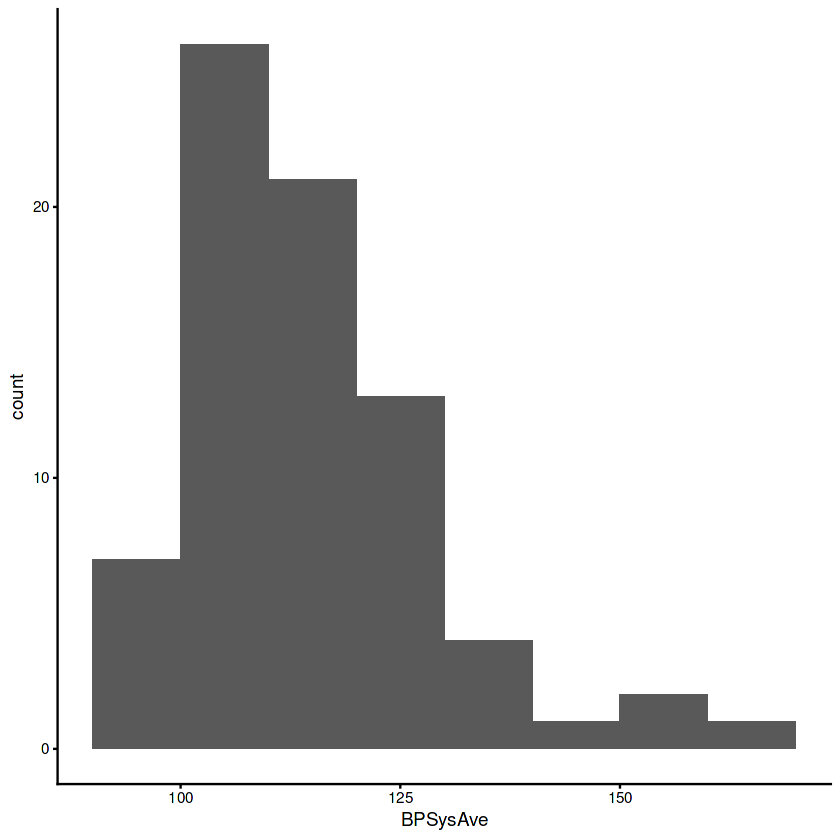

In [23]:
ggplot(data = df,
    mapping = aes(x = BPSysAve)) +
    geom_histogram(breaks = seq(from = 90, to = 170, by = 10)) + 
    theme_classic()

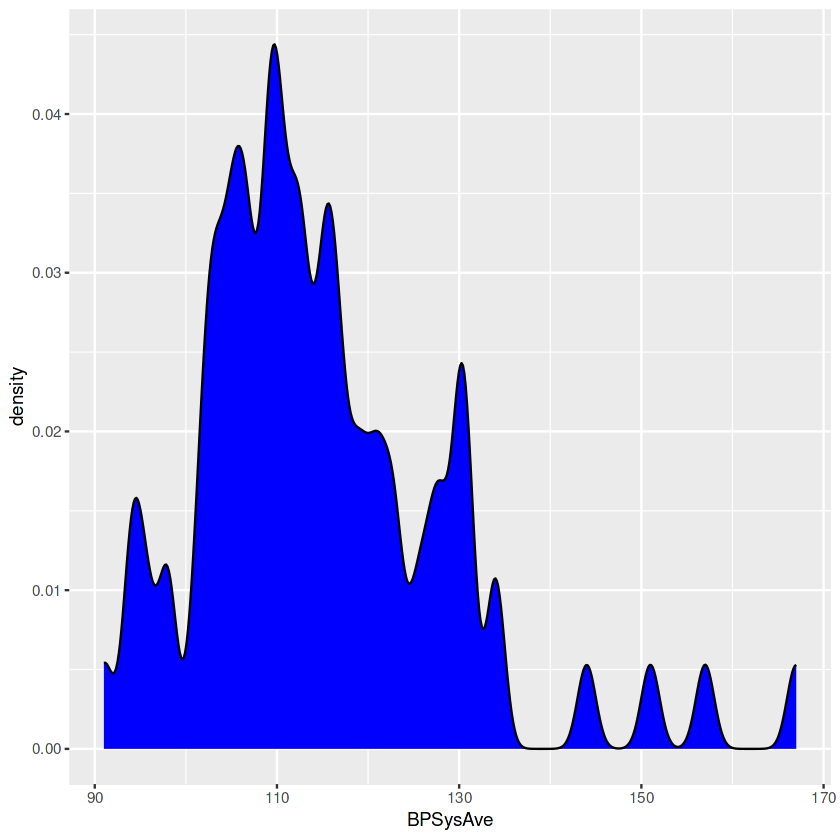

In [24]:
ggplot(data = df,
    mapping = aes(x = BPSysAve)) +
    geom_density(fill="blue", ,bw=1)

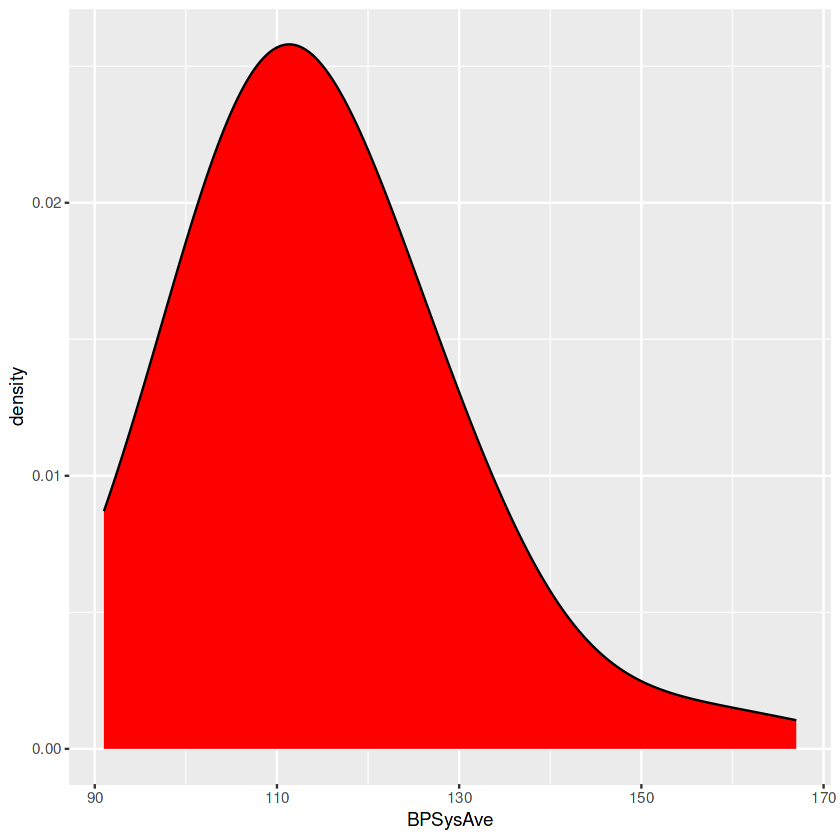

In [25]:
ggplot(data = df,
    mapping = aes(x = BPSysAve)) +
    geom_density(fill="red", ,bw=10)

In [34]:
table(x = df$BP_CAT,y=df$Gender)

                 y
x                 female male
  Normal              31   22
  Prehypertension      5    6
  Hypertension         3    8

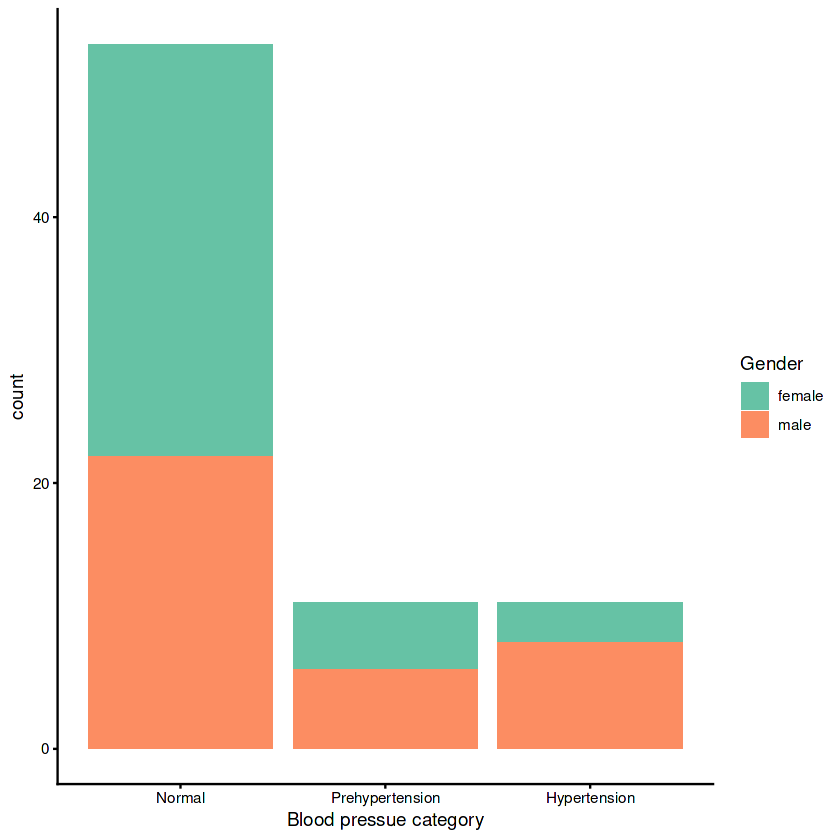

In [46]:
ggplot(data = df,
       mapping = aes(x = BP_CAT, fill = Gender))+
    geom_bar() +
    scale_fill_brewer(palette = "Set2") +
    labs(x = "Blood pressue category") +
    theme_classic()

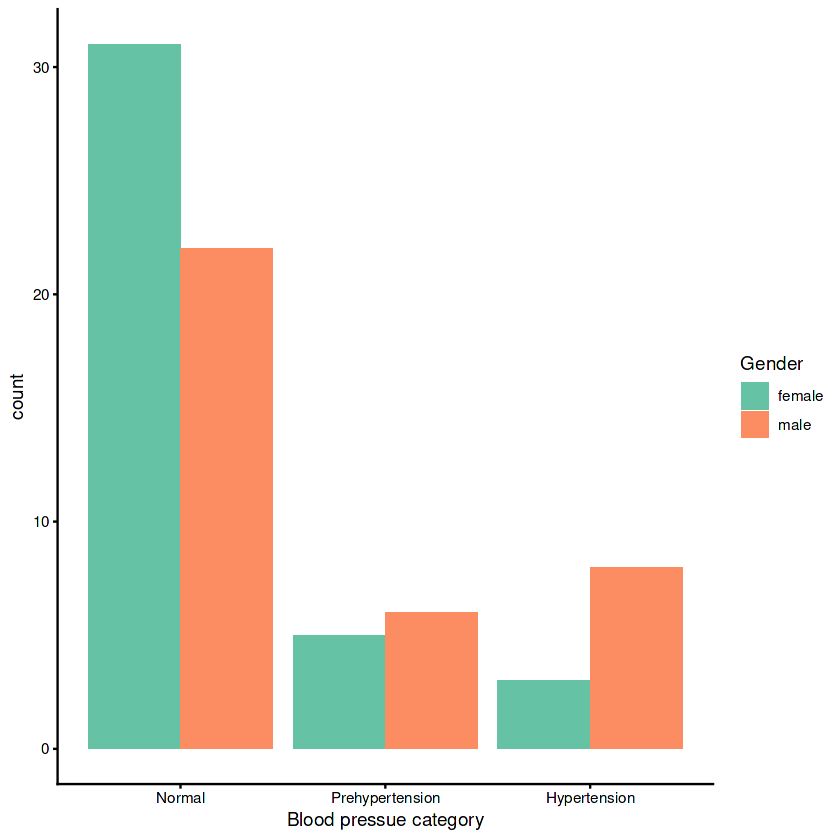

In [48]:
ggplot(data = df,
       mapping = aes(x = BP_CAT, fill = Gender))+
    geom_bar(position = "dodge") +
    scale_fill_brewer(palette = "Set2") +
    labs(x = "Blood pressue category") + 
    theme_classic()

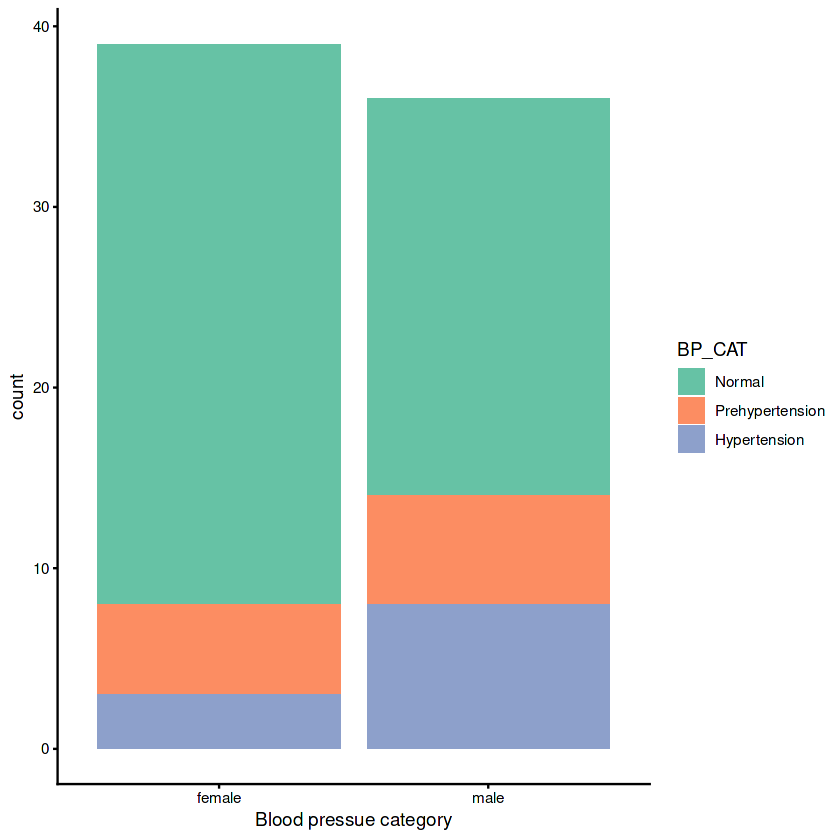

In [49]:
ggplot(data = df,
       mapping = aes(x = Gender, fill = BP_CAT))+
    geom_bar() +
    scale_fill_brewer(palette = "Set2") +
    labs(x = "Blood pressue category") +
    theme_classic()

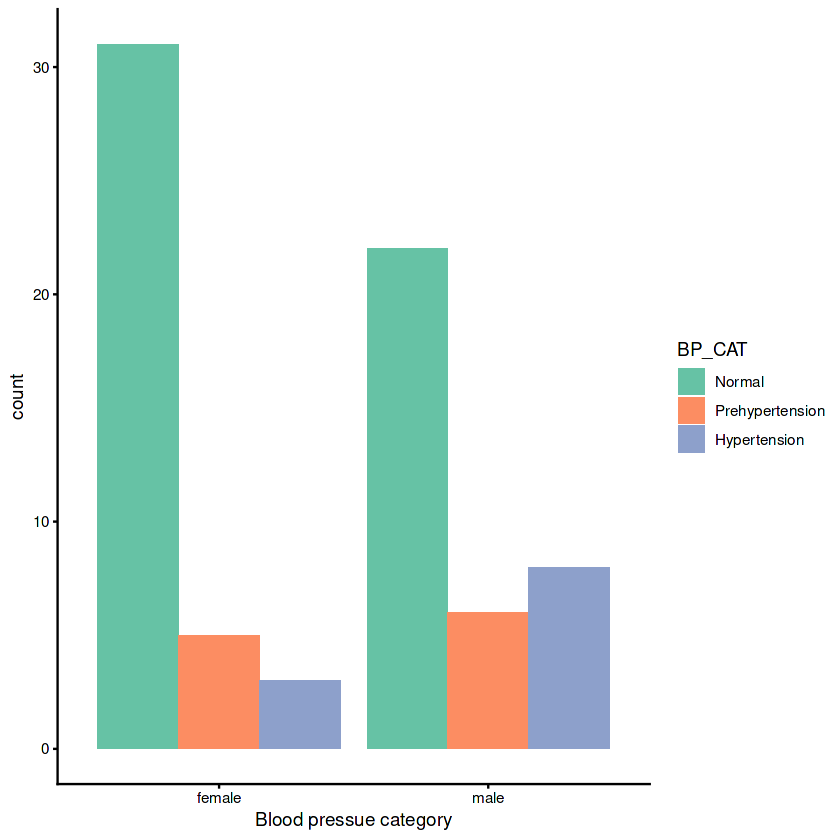

In [50]:
ggplot(data = df,
       mapping = aes(x = Gender, fill = BP_CAT))+
    geom_bar(position = "dodge") +
    scale_fill_brewer(palette = "Set2") +
    labs(x = "Blood pressue category") +
    theme_classic()

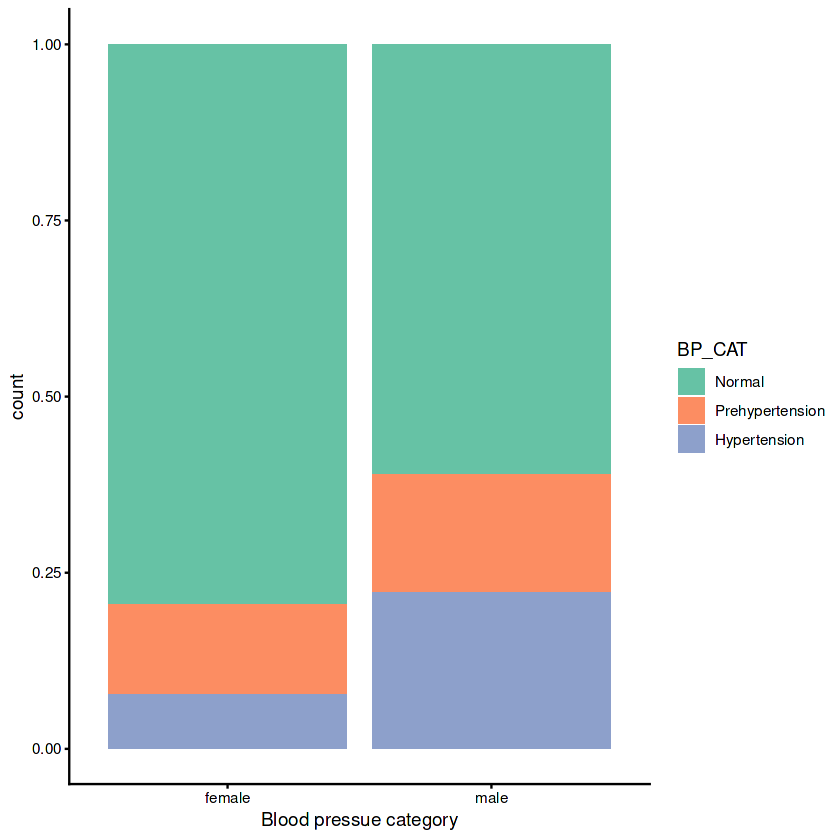

In [51]:
ggplot(data = df,
       mapping = aes(x = Gender, fill = BP_CAT))+
    geom_bar(position =position_fill() ) +
    scale_fill_brewer(palette = "Set2") +
    labs(x = "Blood pressue category") +
    theme_classic()

In [61]:
female_BMI <- df$BMI[df$Gender == "female"]

In [62]:
male_BMI <- df$BMI[df$Gender == "male"]

In [64]:
mean(female_BMI)

[1] 24.88103

In [65]:
median(female_BMI)

[1] 23.9

In [66]:
mean(male_BMI)

[1] 26.3375

In [67]:
median(male_BMI)

[1] 25.495

In [79]:
# or alternativly
aggregate(BMI ~ Gender, 
          data = df, 
          FUN = mean)

Gender,BMI
<fct>,<dbl>
female,24.88103
male,26.33750


In [74]:
quan_10 <- function(x) {
  quantile(x, probs = c(0.10, 0.25, 0.50, 0.75, 0.90))
}

In [75]:
aggregate(BMI ~ Gender, 
          data = df, 
          FUN = quan_10)

Gender,BMI
<fct>,"<dbl[,5]>"
female,"18.784, 20.57, 23.900, 29.02, 31.950"
male,"22.595, 23.86, 25.495, 28.90, 30.995"


In [78]:
aggregate(BMI ~ Gender, 
          data = df, 
          FUN = sd)

Gender,BMI
<fct>,<dbl>
female,5.359738
male,3.440631


In [81]:
aggregate(BMI ~ Gender, 
          data = df, 
          FUN = var)

Gender,BMI
<fct>,<dbl>
female,28.72679
male,11.83794


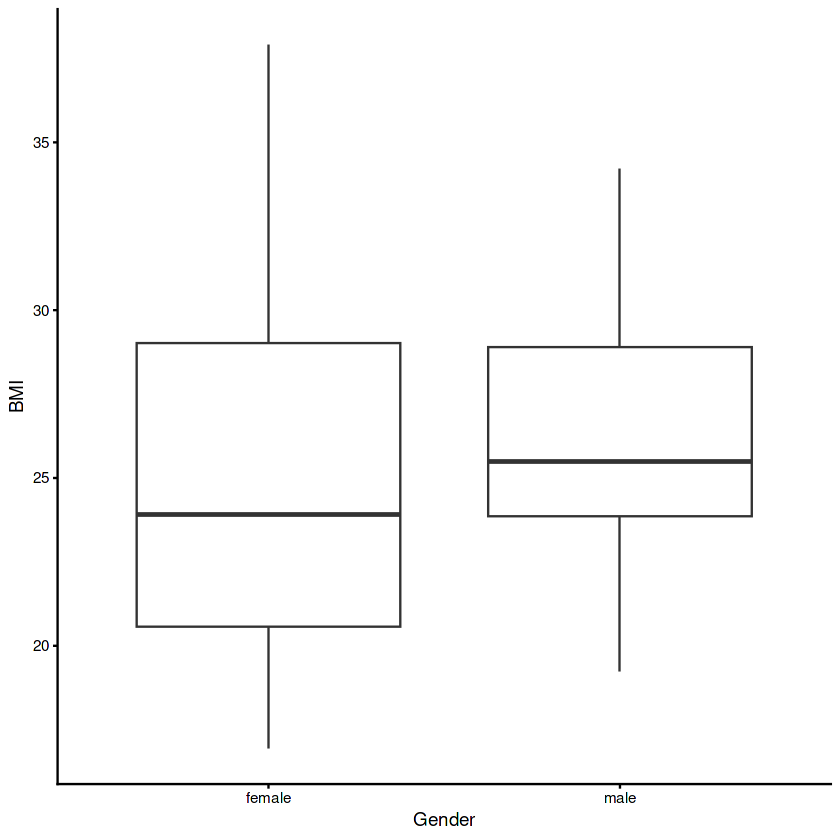

In [82]:
ggplot(data = df,
       mapping = aes(x = Gender, y = BMI))+
    geom_boxplot() +
    theme_classic()

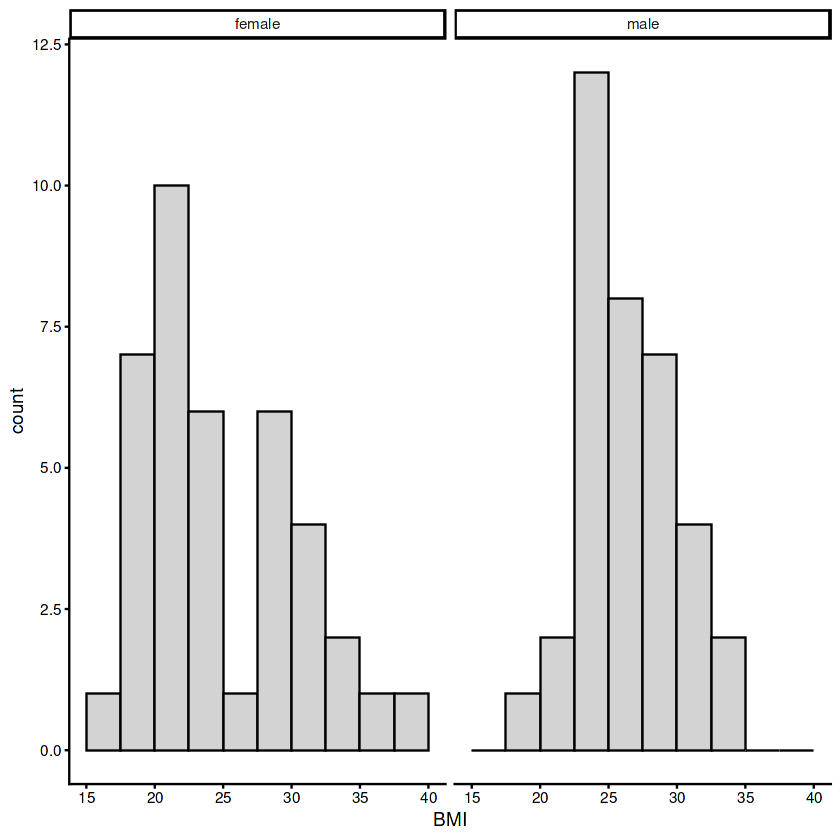

In [88]:
ggplot(data = df,
       mapping = aes(x = BMI)) +
    geom_histogram(breaks = seq(from = 15, to = 40, by = 2.5),
                   fill = "lightgrey", color = "black") +
    facet_wrap(~ Gender) +
    theme_classic()

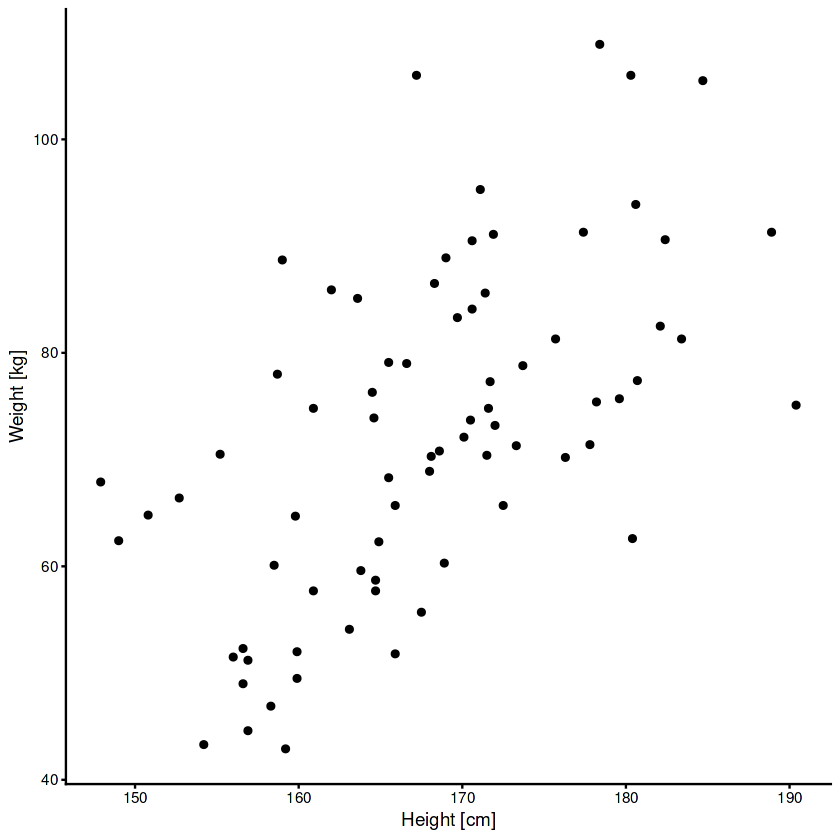

In [122]:
ggplot(data = df,
       mapping = aes(x = Height, y = Weight))+
    geom_point() +
    labs(x = "Height [cm]", y = "Weight [kg]")+
    theme_classic()

In [126]:
cor(x = df$Height, y = df$Weight, 
    method = "pearson")

[1] 0.5921143

In [128]:
cor(x = df$Height, y = df$Weight, 
    method = "spearman")

[1] 0.6221672

In [132]:
# or alternativly
aggregate(BMI ~ Gender, 
          data = df, 
          FUN = mean)



Gender,BMI
<chr>,<dbl>
female,24.88103
male,26.33750


[1] 0.5921143

In [134]:
cor(x = df$Height[df$Gender=='male'], y = df$Weight[df$Gender=='male'], 
    method = "pearson")

[1] 0.432674